# Laboratorio 7
## Clasificación de Malware
Clasificación de malware con identificación de imágenes (TF & Keras)
> #### Gerardo Méndez 18239

In [11]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from keras.constraints import maxnorm

### PARTE 1
Carga de Imágenes & Preprocesamiento

#### Carga de datasets

In [70]:
batch_size = 32
img_height = 128
img_width = 128

In [71]:
DATA_DIRECTORY = 'data/images'

In [72]:
dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.


In [73]:
class_names = train_dataset.class_names
print(class_names)

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']


#### Class distribution

In [74]:
import collections

def get_class_distribution(dataset):
    class_distribution = {}
    for element in dataset.as_numpy_iterator():
        label = element[1][0]

        try:
            class_distribution[label] += 1
        except:
            class_distribution[label] = 0

    class_distribution = collections.OrderedDict(sorted(class_distribution.items())) 
    return class_distribution

In [75]:
class_distribution = get_class_distribution(train_dataset)

In [83]:
for i in range(len(class_names)):
    name = class_names[i]
    dist = class_distribution[i]
    print(name, " " * (15 - len(name)), dist)

Adialer.C        1
Agent.FYI        1
Allaple.A        65
Allaple.L        36
Alueron.gen!J    6
Autorun.K        2
C2LOP.P          2
C2LOP.gen!g      2
Dialplatform.B   5
Dontovo.A        1
Fakerean         11
Instantaccess    11
Lolyda.AA1       0
Lolyda.AA2       2
Lolyda.AA3       4
Lolyda.AT        0
Malex.gen!J      0
Obfuscator.AD    3
Rbot!gen         1
Skintrim.N       2
Swizzor.gen!E    0
Swizzor.gen!I    3
VB.AT            11
Wintrim.BX       2
Yuner.A          9


### PARTE 2
Plot de Imágenes

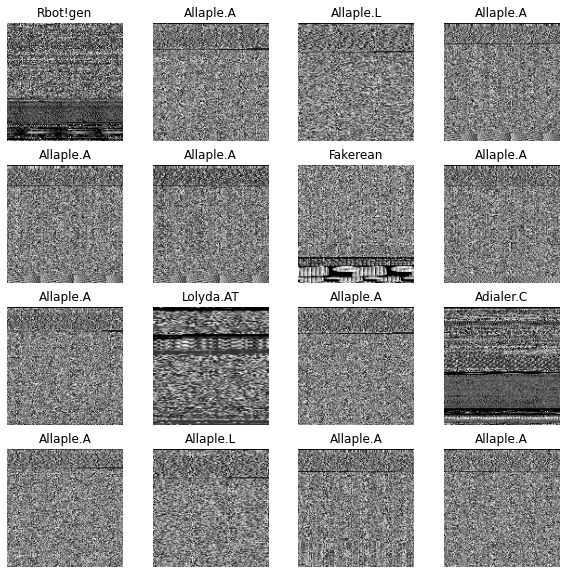

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### PARTE 3
Construcción de Red Neuronal (CNN)

In [110]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, (5, 5), input_shape=(128, 128, 3), activation='relu', padding='same'))
#model.add(keras.layers.MaxPooling2D(2))
#model.add(keras.layers.Dropout(0.2))
#model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation='softmax'))

### PARTE 4
Resumen del modelo

In [111]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [112]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 126, 126, 64)      18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1968128)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               251920512 
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3225      
Total params: 252,018,521
Trainable params: 252,018,521
Non-trainable params: 0
_______________________________________

### PARTE 5
División de los datos

In [101]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.
Using 6538 files for training.


In [102]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
  DATA_DIRECTORY,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 9339 files belonging to 25 classes.
Using 2801 files for validation.


### PARTE 6
Entrenamiento de modelos

In [ ]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
